<h2>Caveat</h2>
Web sites often change the format of their pages so this may not always work. If it doesn't, rework the examples after examining the html content of the page (most browsers will let you see the html source - look for a "page source" option - though you might have to turn on the developer mode in your browser preferences. For example, on Chrome you need to click the "developer mode" check box under Extensions in the Preferences/Options menu. 

<h1>Scraping web pages</h1>
<li>Most data that resides on the web is in HTML 
<li>HTML: HyperText Markup Language
<li>An html web page is a structured document
<li>We can exploit this structure to extract data from the page

<li>Learn html and css at <a href="https://www.khanacademy.org/computing/computer-programming/html-css">this site</a>

<b>Web scraping</b>: Automating the process of extracting information from web pages<br>
<li>for data collection and analysis
<li>for incorporating in a web app 

<h2>Python libraries for web scraping</h2>
<li><b>requests</b> for handling the request-response cycle
<li><b>beautifulsoup4</b> for extracting data from an html string
<li><b>selenium</b> for extracting data from an html string and managing the response process, particularly when a page contains JavaScript or when a button needs to be clicked

<h2>Beautiful Soup</h2>
<li>html and xml parser
<li>makes use of formatted html tags and css properties to extract data
<li>https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<h2>Web scraping using beautifulsoup4</h2>

<h3>Import necessary modules</h3>

In [5]:
!pip install bs4
#import BeautifulSoup

In [1]:
import requests
from bs4 import BeautifulSoup

<h3>The http request response cycle</h3>

In [2]:
url = "http://www.epicurious.com/search/Tofu Chili"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [3]:
keywords = input("Please enter the things you want to see in a recipe")
url = "http://www.epicurious.com/search/" + keywords
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Please enter the things you want to see in a recipe
Success


<h3>Set up the BeautifulSoup object</h3>

In [4]:
# Returns the root page
results_page = BeautifulSoup(response.content,'lxml')   # Recall: response.content returns an objects in bytes

# print(results_page.prettify())     

<h3>BS4 functions</h3>

<h4>find_all finds all instances of a specified tag</h4>
<h4>returns a result_set (a list)</h4>

In [5]:
all_a_tags = results_page.find_all('a')    # Any time you want to embed a link (url), it has
print(type(all_a_tags))                    # to be inside an <a> tag

## The a-tags contain the embedded links.
## The type is a ResultSet object containing a collection of all <a> tags. 
## You have to iterate through that to get all of the <a> tags

<class 'bs4.element.ResultSet'>


In [6]:
## A ResultSet object is a type of collection object. It's a class, but it has the same
## structure as a collection. It contains all the a-tags.

In [7]:
all_a_tags

[<a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a>,
 <a data-reactid="71" href="/recipes/food/views/sugar-cookies-233298">Sugar Cookies</a>,
 <a aria-label="Sugar Cookies" class="photo-link" data-reactid="88" href="/recipes/food/views/sugar-cookies-233298"><div class="photo-wrap" data-reactid="89"><div class="component-lazy pending" data-component="Lazy" data-reactid="90"></div></div></a>,
 <a class="view-complete-item" data-reactid="91" href="/recipes/food/views/sugar-cookies-233298" itemprop="url" title="Sugar Cookies"><!-- react-text: 92 -->View “<!-- /react-text --><!-- react-text: 93 -->Sugar Cookies<!-- /react-text --><!-- react-text: 94 -->”<!-- /react-text --></a>,
 <a class="view-complete-item" data-reactid="96" href="/recipes/food/views/sugar-cookies-233298">View Recipe</a>,
 <a class="show-quick-view" data-reactid="98" href="/recipes/food/views/sugar-cookies-233298" title="Sugar Cookies">Quick view</a>,
 <a class="toggle-compare-state" data-reacti

In [9]:
results_page.find('a',{'data-reactid':"72"})  # to find a specific <a> tag
#Note the second argument is a dictionary object with key-value pairs
# This returns the first a-tag with these sub tags.

<h4>find finds the first instance of a specified tag</h4>
<h4>returns a bs4 element</h4>


In [10]:
div_tag = results_page.find('div')
print(div_tag)

<div class="header-wrapper" data-reactid="2"><div class="header" data-reactid="3" role="banner"><h2 data-reactid="4" itemtype="https://schema.org/Organization"><a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a></h2><div class="search-form-container" data-reactid="6"><form action="/search/" autocomplete="off" data-reactid="7" method="get" role="search"><fieldset data-reactid="8"><button class="submit" data-reactid="9" type="submit">search</button><input autocomplete="off" data-reactid="10" maxlength="120" name="terms" placeholder="Find a Recipe" type="text" value=""/><button class="filter mobile" data-reactid="11">filters</button><button class="filter tablet" data-reactid="12">filter results</button></fieldset></form><div class="ingredient-filters" data-reactid="13"><h3 data-reactid="14">Include/Exclude Ingredients</h3><form class="include-ingredients" data-reactid="15"><fieldset data-reactid="16"><input aria-label="Include ingredients" data-reactid="17" place

In [9]:
type(div_tag)


bs4.element.Tag

<h4>bs4 functions can be recursively applied on elements</h4>

In [10]:
div_tag.find_all('a')

[<a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a>]

<h4>Both find as well as find_all can be qualified by css selectors</h4>
<li>using selector=value
<li>using a dictionary

<h4>Using selector=value</h4>

##### For MacOS: $ \ \texttt{command+option+I} \ $ opens the Developer tab

In [11]:
#When using this method and looking for 'class' use 'class_' (because class is a reserved word in python)
#Note that we get a list back because find_all returns a list
# results_page.find_all('article',{class:"recipe-content-card"})[2].find('a').get('href')
results_page.find_all('article',{'class':"recipe-content-card"})

[<article class="recipe-content-card" data-has-quickview="false" data-index="1" data-reactid="81" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="82"><strong class="tag" data-reactid="83">recipe</strong><h4 class="hed" data-reactid="84" data-truncate="3" itemprop="name"><a data-reactid="85" href="/recipes/food/views/sheet-pan-collard-greens-crispy-tofu-niter-kibbeh">Sheet-Pan Collard Greens and Crispy Tofu With Niter Kibbeh</a></h4><p class="dek" data-reactid="86" data-truncate="1">This easy dinner is inspired by gomen, an Ethiopian dish in which greens are flavored with an aromatic spiced butter. Breaded tofu is a delightful counterpoint.</p><dl class="recipes-ratings-summary" data-reactid="87" data-reviews-count="1" data-reviews-rating="3" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="88">Average user rating</dt><span class="reviews-count-container" data-reactid="89"

In [14]:
results_page.find_all('section',{'data-reactid':"65"})[0].find_all('article',{'class':'recipe-content-card'})

[<article class="recipe-content-card" data-has-quickview="false" data-index="1" data-reactid="81" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="82"><strong class="tag" data-reactid="83">recipe</strong><h4 class="hed" data-reactid="84" data-truncate="3" itemprop="name"><a data-reactid="85" href="/recipes/food/views/sheet-pan-collard-greens-crispy-tofu-niter-kibbeh">Sheet-Pan Collard Greens and Crispy Tofu With Niter Kibbeh</a></h4><p class="dek" data-reactid="86" data-truncate="1">This easy dinner is inspired by gomen, an Ethiopian dish in which greens are flavored with an aromatic spiced butter. Breaded tofu is a delightful counterpoint.</p><dl class="recipes-ratings-summary" data-reactid="87" data-reviews-count="1" data-reviews-rating="3" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="88">Average user rating</dt><span class="reviews-count-container" data-reactid="89"

<h4>Using selectors as key value pairs in a dictionary</h4>

In [12]:
#Since we're using a string as the key, the fact that class is a reserved word is not a problem
#We get an element back because find returns an element
results_page.find('article',{'class':'recipe-content-card'})

<article class="recipe-content-card" data-has-quickview="false" data-index="1" data-reactid="81" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="82"><strong class="tag" data-reactid="83">recipe</strong><h4 class="hed" data-reactid="84" data-truncate="3" itemprop="name"><a data-reactid="85" href="/recipes/food/views/grilled-jerk-tofu-plantains-mango-salsa-vegan">Grilled Jerk Tofu and Plantains With Mango Salsa</a></h4><p class="dek" data-reactid="86" data-truncate="1">For this grilled tofu recipe, allspice, thyme, garlic, brown sugar, and Scotch bonnet peppers join together in an aromatic marinade that’s spicy and warm.</p><dl class="recipes-ratings-summary" data-reactid="87" data-reviews-count="0" data-reviews-rating="0" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="88">Average user rating</dt><span class="reviews-count-container" data-reactid="89"><dd class="rating" d

In [ ]:
type(results_page)

<h4>get_text() returns the marked up text (the content) enclosed in a tag.</h4>
<li>returns a string

In [13]:
results_page.find('article',{'class':'recipe-content-card'}).get_text()

'recipeGrilled Jerk Tofu and Plantains With Mango SalsaFor this grilled tofu recipe, allspice, thyme, garlic, brown sugar, and Scotch bonnet peppers join together in an aromatic marinade that’s spicy and warm.Average user rating0/4Reviews0Percentage of reviewers who will make this recipe again0%View “Grilled Jerk Tofu and Plantains With Mango Salsa”View RecipeQuick viewCompare Recipe'

In [14]:
type(results_page)

bs4.BeautifulSoup

<h4>get returns the value of a tag attribute</h4>
<li>returns a string

In [15]:
recipe_tag = results_page.find('article',{'class':'recipe-content-card'})
recipe_link = recipe_tag.find('a')   ## finds the first a-tag only (not all of them)
print("a tag:",recipe_link)
link_url = recipe_link.get('href')  ## to get attributes values from a tag, use the tag .get('') command
print("link url:",link_url)  ## not the full URL, only the relative URL. Need to prepend the name of the server in front of it
print(type(link_url))

a tag: <a data-reactid="85" href="/recipes/food/views/grilled-jerk-tofu-plantains-mango-salsa-vegan">Grilled Jerk Tofu and Plantains With Mango Salsa</a>
link url: /recipes/food/views/grilled-jerk-tofu-plantains-mango-salsa-vegan
<class 'str'>


In [16]:
results_page.find_all('article',class_="recipe-content-card")

[<article class="recipe-content-card" data-has-quickview="false" data-index="1" data-reactid="81" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="82"><strong class="tag" data-reactid="83">recipe</strong><h4 class="hed" data-reactid="84" data-truncate="3" itemprop="name"><a data-reactid="85" href="/recipes/food/views/grilled-jerk-tofu-plantains-mango-salsa-vegan">Grilled Jerk Tofu and Plantains With Mango Salsa</a></h4><p class="dek" data-reactid="86" data-truncate="1">For this grilled tofu recipe, allspice, thyme, garlic, brown sugar, and Scotch bonnet peppers join together in an aromatic marinade that’s spicy and warm.</p><dl class="recipes-ratings-summary" data-reactid="87" data-reviews-count="0" data-reviews-rating="0" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="88">Average user rating</dt><span class="reviews-count-container" data-reactid="89"><dd class="rating" 

<h2>Summary of bs4 functions</h2>

 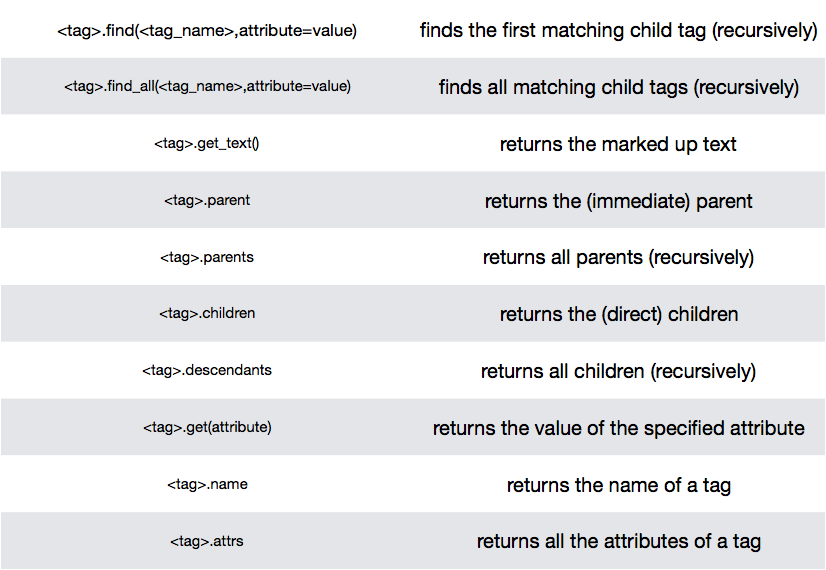

<h1>A function that returns a list containing recipe names, recipe descriptions (if any) and recipe urls</h1>


<li>We want to create a list of recipes and links to the recipes
<li>We need to figure out how to ‘programmatically’ extract each recipe name and recipe link

<li>Search for the tag with a unique attribute value that identifies recipes and recipe links
<li>We’ll look at the a (annotate) tags because clickable links are in a tags

In [17]:
for tag in results_page.find_all('article'):
    print(tag)

<article class="article-content-card" data-has-quickview="false" data-index="0" data-reactid="68" itemscope="" itemtype="https://schema.org/ItemPage"><header class="summary" data-reactid="69"><strong class="tag" data-reactid="70">article</strong><h4 class="hed" data-reactid="71" data-truncate="3" itemprop="name"><a data-reactid="72" href="/expert-advice/jerk-tofu-is-the-meatless-main-you-didnt-know-you-were-missing-article">For the Best Jerk Tofu, Freeze, Then Grill</a></h4><p class="dek" data-reactid="73" data-truncate="1">And don't forget to give that block of tofu a nice soak in a classic jerk marinade that's warm, spicy, and gently sweet.</p></header><a aria-label="For the Best Jerk Tofu, Freeze, Then Grill" class="photo-link" data-reactid="74" href="/expert-advice/jerk-tofu-is-the-meatless-main-you-didnt-know-you-were-missing-article"><div class="photo-wrap" data-reactid="75"><div class="component-lazy pending" data-component="Lazy" data-reactid="76"></div></div></a><a class="view

In [18]:
def get_recipes(keywords):
    recipe_list = list()
    import requests
    from bs4 import BeautifulSoup
    url = "http://www.epicurious.com/search/" + keywords
    response = requests.get(url)
    if not response.status_code == 200:
        return None
    try:
        results_page = BeautifulSoup(response.content,'lxml')
        recipes = results_page.find_all('article',class_="recipe-content-card")
        for recipe in recipes:
            recipe_link = "http://www.epicurious.com" + recipe.find('a').get('href')
            recipe_name = recipe.find('a').get_text()
            try:
                recipe_description = recipe.find('p',class_='dek').get_text() # the p-tag is for paragraphs. When a new paragraph starts, there's a p tag
            except:
                recipe_description = ''
            recipe_list.append((recipe_name,recipe_link,recipe_description))
        return recipe_list
    except:
        return None

In [19]:
get_recipes("Tofu")

[('Grilled Jerk Tofu and Plantains With Mango Salsa',
  'http://www.epicurious.com/recipes/food/views/grilled-jerk-tofu-plantains-mango-salsa-vegan',
  'For this grilled tofu recipe, allspice, thyme, garlic, brown sugar, and Scotch bonnet peppers join together in an aromatic marinade that’s spicy and warm.'),
 ('Spicy Braised Tofu',
  'http://www.epicurious.com/recipes/food/views/spicy-braised-tofu',
  'In this riff on dubu jorim, a popular Korean side dish, thick slices of pan-fried tofu quickly braise in a sweet-and-spicy sauce. A side of rice and sautéed greens turns it into a meal.'),
 ('Baked Chocolate Tofu Cheesecake',
  'http://www.epicurious.com/recipes/food/views/baked-chocolate-tofu-vegan-cheesecake-donna-hay',
  'This cheesecake has a chocolatey rich mousse-like texture that is absolutely amazing.'),
 ('Spinach Dumplings',
  'http://www.epicurious.com/recipes/food/views/spinach-dumplings-jason-wang-xian-famous-foods',
  'Want showstopping presentation? Make homemade dumpling

<h2>Let's write a function that</h2>
<h3>given a recipe link</h3>
<h3>returns a dictionary containing the ingredients and preparation instructions</h3>

In [21]:
recipe_link = "http://www.epicurious.com" + '/recipes/food/views/spicy-lemongrass-tofu-233844'

In [37]:
def get_recipe_info(recipe_link):
    recipe_dict = dict()
    import requests
    from bs4 import BeautifulSoup
    try:
        response = requests.get(recipe_link)
        if not response.status_code == 200:
            return recipe_dict
        result_page = BeautifulSoup(response.content,'lxml')
        ingredient_list = list()
        prep_steps_list = list()
        ingredientsection = result_page.find('div',{"data-testid":"IngredientList"})
        for ingredient in ingredientsection.find_all('div',{"class":re.compile('BaseWrap.*Description.*')}):
            ingredient_list.append(ingredient.get_text())
        stepssection = result_page.find('div',{"class":re.compile('BaseWrap.*recipe__instruction-list')})
        for step in stepssection.find_all('p'):
            prep_steps_list.append(step.get_text())
        recipe_dict['ingredients'] = ingredient_list
        recipe_dict['preparation'] = prep_steps_list
        return recipe_dict
    except:
        return recipe_dict
        

In [38]:
recipe_link = 'http://www.epicurious.com/recipes/food/views/spicy-lemongrass-tofu-233844'
get_recipe_info(recipe_link)
              

{'ingredients': ['2 lemongrass stalks, outer layers peeled, bottom white part thinly sliced and finely chopped (about 1/4 cup)',
  '1 1/2 tablespoons soy sauce',
  '2 teaspoons chopped Thai bird chilies or another fresh chili',
  '1/2 teaspoon dried chili flakes',
  '1 teaspoon ground turmeric',
  '2 teaspoons sugar',
  '1/2 teaspoon salt',
  '12 ounces tofu, drained, patted dry and cut into 3/4-inch cubes',
  '4 tablespoons vegetable oil',
  '1/2 yellow onion, cut into 1/8-inch slices',
  '2 shallots, thinly sliced',
  '1 teaspoon minced garlic',
  '4 tablespoons chopped roasted peanuts',
  '10 la lot, or pepper leaves, shredded, or 2/3 cup loosely packed Asian basil leaves'],
 'preparation': ['1. Combine the lemongrass, soy sauce, chilies, chili flakes, turmeric, sugar and salt in a bowl. Add the tofu cubes and turn to coat them evenly. Marinate for 30 minutes.',
  '2. Heat half of the oil in a 12-inch nonstick skillet over moderately high heat. Add the onion, shallot and garlic and 

## Alternative code for previous version of webpage (will not work anymore):

In [ ]:
## Alternative code for previous version of webpage (will not work anymore):
def get_recipe_info(recipe_link):
    recipe_dict = dict()
    import requests
    from bs4 import BeautifulSoup
    try:
        response = requests.get(recipe_link)
        if not response.status_code == 200:
            return recipe_dict
        result_page = BeautifulSoup(response.content,'lxml')
        ingredient_list = list()
        prep_steps_list = list()
        for ingredient in result_page.find_all('li',class_='ingredient'): ## li is a list tag (bulleted list)
            ingredient_list.append(ingredient.get_text())
        for prep_step in result_page.find_all('li',class_='preparation-step'):
            prep_steps_list.append(prep_step.get_text().strip())
        recipe_dict['ingredients'] = ingredient_list
        recipe_dict['preparation'] = prep_steps_list
        return recipe_dict
    except:
        return recipe_dict

<h2>Construct a list of dictionaries for all recipes</h2>

In [39]:
def get_all_recipes(keywords):
    results = list()
    all_recipes = get_recipes(keywords)
    for recipe in all_recipes:
        recipe_dict = get_recipe_info(recipe[1])
        recipe_dict['name'] = recipe[0]
        recipe_dict['description'] = recipe[2]
        results.append(recipe_dict)
    return(results)

In [40]:
get_all_recipes("Tofu")

[{'ingredients': ['2 14-oz. blocks extra-firm tofu, drained',
   '2 small red onions, coarsely chopped',
   '10 scallions, cut into 2" pieces',
   '12 garlic cloves',
   '4–6 Scotch bonnet or habanero chiles, seeds removed, or 1–2 tsp. Scotch bonnet chile powder',
   '12 sprigs thyme, leaves picked',
   '2 1" pieces ginger, peeled',
   '16–20 allspice berries or 2 Tbsp. ground allspice',
   '⅔ cup soy sauce',
   '½ cup (packed) dark brown sugar',
   '½ cup distilled white vinegar',
   '¼ cup fresh lime juice',
   '1 Tbsp. plus 1 tsp. browning sauce (preferably Grace; optional)',
   '1 Tbsp. freshly ground black pepper',
   '2 tsp. Diamond Crystal or 1¼ tsp. Morton kosher salt',
   '½ tsp. freshly grated nutmeg',
   '½ tsp. ground cinnamon',
   '¼ cup avocado oil or vegetable oil',
   'Juice of 1 lime',
   '1 Scotch bonnet chile or jalapeño, seeds removed',
   '2 cups coarsely chopped ripe mango',
   '⅔ cup coarsely chopped red bell pepper',
   '½ cup coarsely chopped red onion',
   '2 

<h1>Logging in to a web server</h1>

<li>Figure out the login url 
<li>https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page
<li>Look for the login form in the html source
<li>form_tag = page_soup.find('form')
<li>Look for ALL the inputs in the login form (some may be tricky!)
<li>input_tags = form_tag.find_all('input')
<li>Create a Python dict object with key,value pairs for each input
<li>Use requests.session to create an open session object
<li>Send the login request (POST)
<li>Send followup requests keeping the sessions object open

<h2>Get username and password</h2>
<li>Best to store in a file for reuse
<li>You will need to set up your own login and password and place them in a file called wikidata.txt
<li>Line one of the file should contain your username
<li>Line two your password

In [29]:
with open('/home/uday/Documents/Columbia_University/API_Keys/wikidata.txt') as f:
    contents = f.read().split('\n')
    username = contents[0]
    password = contents[1]


<h3>Construct an object that contains the data to be sent to the login page</h3>

In [30]:
## data taken from input tags. The key is from the name tag, and the value is from the value tag.
payload = {
    'wpName': username,
    'wpPassword': password,
    'wploginattempt': 'Log in',
    'wpEditToken': "+\\",
    'title': "Special:UserLogin",
    'authAction': "login",
    'force': "",
    'wpForceHttps': "1",
    'wpFromhttp': "1",
    #'wpLoginToken': ‘', #We need to read this from the page
    }

<h3>get the value of the login token</h3>

In [31]:
def get_login_token(response):
    soup = BeautifulSoup(response.text, 'lxml')
    token = soup.find('input',{'name':"wpLoginToken"}).get('value')
    return token


<h3>Setup a session, login, and get data</h3>

In [32]:
import requests
from bs4 import BeautifulSoup
with requests.session() as s:
    response = s.get('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page')
    payload['wpLoginToken'] = get_login_token(response)
    #Send the login request
#     response_post = s.post('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&action=submitlogin&type=login',
#                            data=payload)
    ## the s.post() method takes new information and updates the server with it.
    response_post = s.post('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page',
                           data=payload)
    #Get another page and check if we’re still logged in
    response = s.get('https://en.wikipedia.org/wiki/Special:Watchlist')
    data = BeautifulSoup(response.content,'lxml')
    print(data.find('div',class_='watchlistDetails').get_text())

You have 1 page on your watchlist (excluding talk pages).
Changes to pages since you last visited them are shown in bold with solid markers.

